In [3]:
#importations of packaged
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sas7bdat import SAS7BDAT
import seaborn as sns
import plotly.express as px
sns.set()

In [4]:
planets = pd.read_csv('data/exoplanets.csv') 

In [5]:
#checking the csv dataframe
planets.head()

,loc_rowid,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_telescope,disc_instrument,pl_controv_flag,...,glat,glon,elat,elon,sy_pm,sy_pmra,sy_dist,sy_plx,sy_vmag,rowupdate
0,1,11 Com b,11 Com,2,1,Radial Velocity,2007,2.16 m Telescope,Coude Echelle Spectrograph,0,...,78.28058,264.13775,18.33392,177.41790,140.383627,-109.24100,93.1846,10.71040,4.72307,2014-07-23
1,2,11 Com b,11 Com,2,1,Radial Velocity,2007,2.16 m Telescope,Coude Echelle Spectrograph,0,...,78.28058,264.13775,18.33392,177.41790,140.383627,-109.24100,93.1846,10.71040,4.72307,2014-05-14
2,3,11 Com b,11 Com,2,1,Radial Velocity,2007,2.16 m Telescope,Coude Echelle Spectrograph,0,...,78.28058,264.13775,18.33392,177.41790,140.383627,-109.24100,93.1846,10.71040,4.72307,2023-09-19
3,4,11 UMi b,11 UMi,1,1,Radial Velocity,2009,2.0 m Alfred Jensch Telescope,Coude Echelle Spectrograph,0,...,41.04437,108.71900,74.95821,141.64699,10.679019,3.42996,125.3210,7.95388,5.01300,2018-09-04
4,5,11 UMi b,11 UMi,1,1,Radial Velocity,2009,2.0 m Alfred Jensch Telescope,Coude Echelle Spectrograph,0,...,41.04437,108.71900,74.95821,141.64699,10.679019,3.42996,125.3210,7.95388,5.01300,2018-04-25


In [6]:
#doublechecking the info
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35131 entries, 0 to 35130
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loc_rowid        35131 non-null  int64  
 1   pl_name          35131 non-null  object 
 2   hostname         35131 non-null  object 
 3   sy_snum          35131 non-null  int64  
 4   sy_pnum          35131 non-null  int64  
 5   discoverymethod  35131 non-null  object 
 6   disc_year        35131 non-null  int64  
 7   disc_telescope   35131 non-null  object 
 8   disc_instrument  35131 non-null  object 
 9   pl_controv_flag  35131 non-null  int64  
 10  pl_orbper        32062 non-null  float64
 11  pl_orbsmax       19428 non-null  float64
 12  pl_rade          24171 non-null  float64
 13  pl_bmasse        5652 non-null   float64
 14  pl_dens          1867 non-null   float64
 15  pl_orbeccen      17637 non-null  float64
 16  pl_insol         14938 non-null  float64
 17  pl_eqt      

In [7]:
#pesky missing value lol
planets[planets['rowupdate'].isna()]

,loc_rowid,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_telescope,disc_instrument,pl_controv_flag,...,glat,glon,elat,elon,sy_pm,sy_pmra,sy_dist,sy_plx,sy_vmag,rowupdate
32366,32367,MOA-2009-BLG-319L b,MOA-2009-BLG-319L,1,1,Microlensing,2010,1.8 m MOA Telescope,MOA CCD Array,0,...,-3.01439,4.20225,-3.38983,271.55748,NaN,NaN,7050.0,NaN,NaN,NaN


In [8]:
#getting rid of it
planets = planets.dropna(subset=['rowupdate'])
planets[planets['rowupdate'].isna()]

,loc_rowid,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_telescope,disc_instrument,pl_controv_flag,...,glat,glon,elat,elon,sy_pm,sy_pmra,sy_dist,sy_plx,sy_vmag,rowupdate


In [9]:
#now lets drop the original rowid
planets = planets.drop('loc_rowid', axis=1)
planets.head()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_telescope,disc_instrument,pl_controv_flag,pl_orbper,...,glat,glon,elat,elon,sy_pm,sy_pmra,sy_dist,sy_plx,sy_vmag,rowupdate
0,11 Com b,11 Com,2,1,Radial Velocity,2007,2.16 m Telescope,Coude Echelle Spectrograph,0,NaN,...,78.28058,264.13775,18.33392,177.41790,140.383627,-109.24100,93.1846,10.71040,4.72307,2014-07-23
1,11 Com b,11 Com,2,1,Radial Velocity,2007,2.16 m Telescope,Coude Echelle Spectrograph,0,326.03000,...,78.28058,264.13775,18.33392,177.41790,140.383627,-109.24100,93.1846,10.71040,4.72307,2014-05-14
2,11 Com b,11 Com,2,1,Radial Velocity,2007,2.16 m Telescope,Coude Echelle Spectrograph,0,323.21000,...,78.28058,264.13775,18.33392,177.41790,140.383627,-109.24100,93.1846,10.71040,4.72307,2023-09-19
3,11 UMi b,11 UMi,1,1,Radial Velocity,2009,2.0 m Alfred Jensch Telescope,Coude Echelle Spectrograph,0,516.21997,...,41.04437,108.71900,74.95821,141.64699,10.679019,3.42996,125.3210,7.95388,5.01300,2018-09-04
4,11 UMi b,11 UMi,1,1,Radial Velocity,2009,2.0 m Alfred Jensch Telescope,Coude Echelle Spectrograph,0,NaN,...,41.04437,108.71900,74.95821,141.64699,10.679019,3.42996,125.3210,7.95388,5.01300,2018-04-25


In [10]:
#making the updated col datetime
planets['rowupdate'] = pd.to_datetime(planets['rowupdate'], format='%Y-%m-%d')
#making discovery year datetime
planets['disc_year'] = pd.to_datetime(planets['disc_year'], format='%Y')


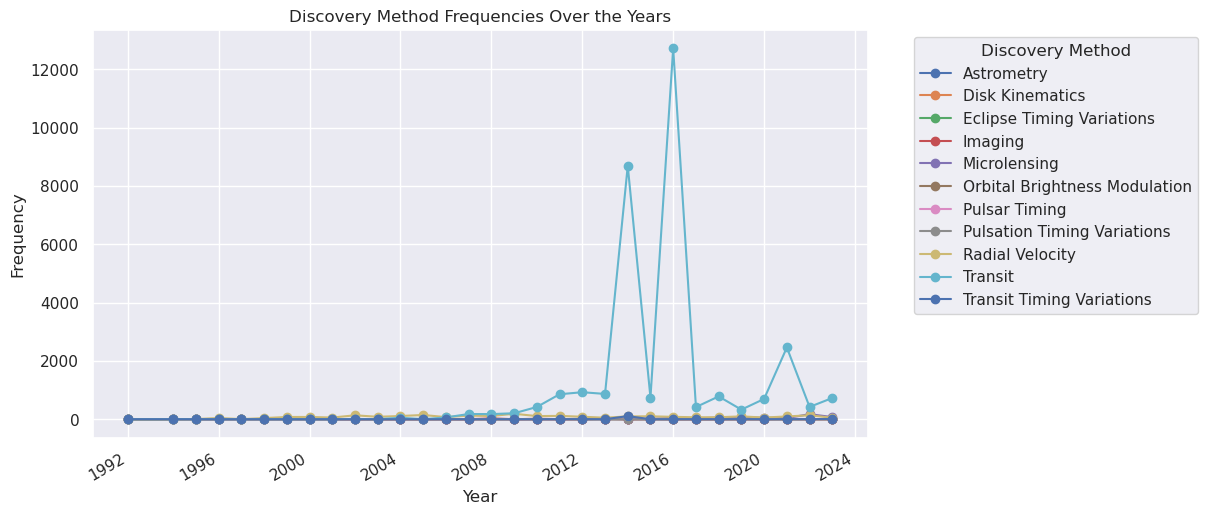

In [11]:
grouped_data = planets.groupby(['disc_year', 'discoverymethod']).size().reset_index(name='count')
pivot_data = grouped_data.pivot(index='disc_year', columns='discoverymethod', values='count').fillna(0)
pivot_data.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Discovery Method Frequencies Over the Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Discovery Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

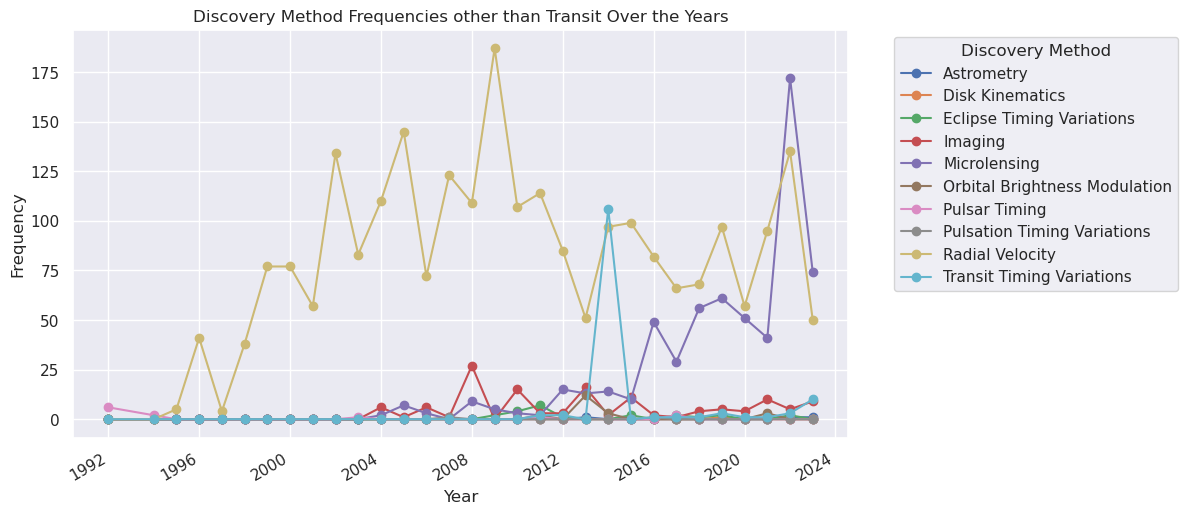

In [12]:
df_filtered = planets[planets['discoverymethod'] != 'Transit']
grouped_data = df_filtered.groupby(['disc_year', 'discoverymethod']).size().reset_index(name='count')
pivot_data = grouped_data.pivot(index='disc_year', columns='discoverymethod', values='count').fillna(0)
pivot_data.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Discovery Method Frequencies other than Transit Over the Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Discovery Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [13]:

df = planets

# Sort the DataFrame based on 'pl_name' and 'rowupdate'
df_sorted = df.sort_values(by=['pl_name', 'rowupdate'], ascending=[True, False])

# Define a function to fill missing values with values from the next most recent 'rowupdate'
def fill_missing(group):
    filled_group = group.ffill().bfill()

    # Create a new column 'total_discovery_type'
    filled_group['total_discovery_type'] = filled_group['discoverymethod']

    # Concatenate 'discovery_type' from the next most recent if not already in the 'total_discovery_type'
    for i in range(1, len(filled_group)):
        if filled_group['discoverymethod'].iloc[i] not in filled_group['total_discovery_type'].iloc[0].split(','):
            filled_group['total_discovery_type'].iloc[0] += ',' + filled_group['discoverymethod'].iloc[i]

    return filled_group.head(1)  # Keep only the most recent row after filling missing values

# Apply the function to the DataFrame using groupby
planets = df_sorted.groupby('pl_name').apply(fill_missing)

# Reset the index after grouping
planets.reset_index(drop=True, inplace=True)



In [14]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5539 entries, 0 to 5538
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   pl_name               5539 non-null   object        
 1   hostname              5539 non-null   object        
 2   sy_snum               5539 non-null   int64         
 3   sy_pnum               5539 non-null   int64         
 4   discoverymethod       5539 non-null   object        
 5   disc_year             5539 non-null   datetime64[ns]
 6   disc_telescope        5539 non-null   object        
 7   disc_instrument       5539 non-null   object        
 8   pl_controv_flag       5539 non-null   int64         
 9   pl_orbper             5296 non-null   float64       
 10  pl_orbsmax            5238 non-null   float64       
 11  pl_rade               4202 non-null   float64       
 12  pl_bmasse             2623 non-null   float64       
 13  pl_dens           

In [15]:
data2=planets.groupby(['hostname','discoverymethod'])[['sy_dist','glat','glon']].mean().reset_index()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hostname         4213 non-null   object 
 1   discoverymethod  4213 non-null   object 
 2   sy_dist          4115 non-null   float64
 3   glat             4213 non-null   float64
 4   glon             4213 non-null   float64
dtypes: float64(3), object(2)
memory usage: 164.7+ KB


In [16]:
data=planets.groupby('hostname')[['sy_dist','glat','glon']].mean()

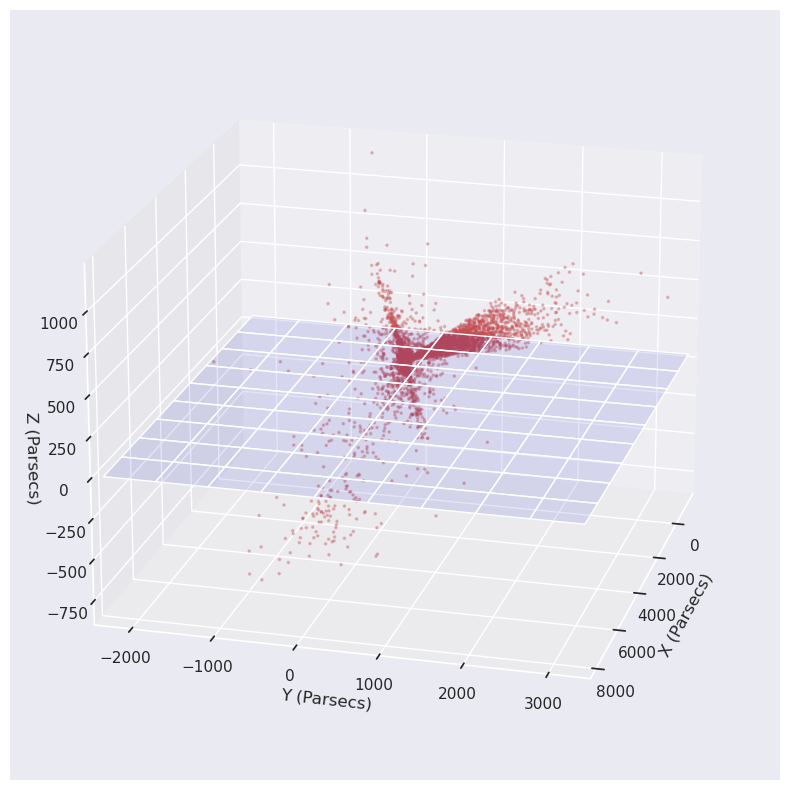

In [17]:

from mpl_toolkits.mplot3d import Axes3D

x = data['sy_dist'] * np.cos(np.radians(data['glon'])) * np.cos(np.radians(data['glat']))
y = data['sy_dist'] * np.sin(np.radians(data['glon'])) * np.cos(np.radians(data['glat']))
z = data['sy_dist'] * np.sin(np.radians(data['glat']))


earth_latitude = 0  # Replace with the actual galactic latitude of Earth
earth_longitude = 0  # Replace with the actual galactic longitude of Earth
earth_distance = 0  # Replace with the actual distance from Earth to the galactic center

# Convert galactic coordinates to Cartesian coordinates for Earth
earth_x = earth_distance * np.cos(np.radians(earth_longitude)) * np.cos(np.radians(earth_latitude))
earth_y = earth_distance * np.sin(np.radians(earth_longitude)) * np.cos(np.radians(earth_latitude))
earth_z = earth_distance * np.sin(np.radians(earth_latitude))

galactic_plane_latitude = 0  # Latitude at which the galactic plane is displayed
galactic_plane_size = 500 

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=10, c='r', marker='.', alpha=0.3)


# Plot Earth in green
#ax.scatter(earth_x, earth_y, earth_z, s=500, c='r', marker='.', label='Earth')

# Set labels
ax.set_xlabel('X (Parsecs)')
ax.set_ylabel('Y (Parsecs)')
ax.set_zlabel('Z (Parsecs)')

galactic_plane_x = np.linspace(-2000, max(x), 10)
galactic_plane_y = np.linspace(min(y), max(y), 10)
galactic_plane_x, galactic_plane_y = np.meshgrid(galactic_plane_x, galactic_plane_y)
galactic_plane_z = np.full_like(galactic_plane_x, galactic_plane_size * np.sin(np.radians(galactic_plane_latitude)))

ax.plot_surface(galactic_plane_x, galactic_plane_y, galactic_plane_z, alpha=.1, color='blue', label='Galactic Plane')

ax.set_xlim([min(x), max(x)])
ax.set_ylim([min(y), max(y)])
ax.set_zlim([min(z), max(z)])

#ax.set_xlim([-250, 250])
#ax.set_ylim([-250, 250])
#ax.set_zlim([-250, 250])


ax.view_init(elev=20, azim=15)

# Show the plot
plt.show()

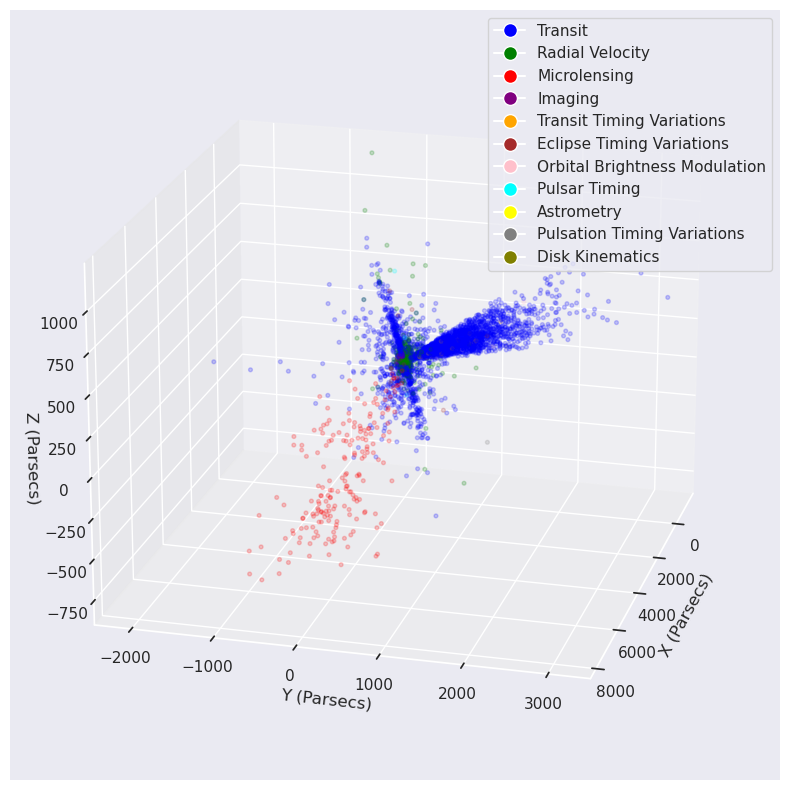

In [18]:
from mpl_toolkits.mplot3d import Axes3D

color_map = {
    'Transit': 'blue',
    'Radial Velocity': 'green',
    'Microlensing': 'red',
    'Imaging': 'purple',
    'Transit Timing Variations': 'orange',
    'Eclipse Timing Variations': 'brown',
    'Orbital Brightness Modulation': 'pink',
    'Pulsar Timing': 'cyan',
    'Astrometry': 'yellow',
    'Pulsation Timing Variations': 'gray',
    'Disk Kinematics': 'olive'
}

# Map the colors based on the 'discovery method' column
colors = data2['discoverymethod'].map(color_map)

x = data2['sy_dist'] * np.cos(np.radians(data2['glon'])) * np.cos(np.radians(data2['glat']))
y = data2['sy_dist'] * np.sin(np.radians(data2['glon'])) * np.cos(np.radians(data2['glat']))
z = data2['sy_dist'] * np.sin(np.radians(data2['glat']))


earth_latitude = 0  # Replace with the actual galactic latitude of Earth
earth_longitude = 0  # Replace with the actual galactic longitude of Earth
earth_distance = 0  # Replace with the actual distance from Earth to the galactic center

# Convert galactic coordinates to Cartesian coordinates for Earth
earth_x = earth_distance * np.cos(np.radians(earth_longitude)) * np.cos(np.radians(earth_latitude))
earth_y = earth_distance * np.sin(np.radians(earth_longitude)) * np.cos(np.radians(earth_latitude))
earth_z = earth_distance * np.sin(np.radians(earth_latitude))

galactic_plane_latitude = 0  # Latitude at which the galactic plane is displayed
galactic_plane_size = 500 

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=30, c=colors, marker='.', alpha=0.2)


# Plot Earth in green
#ax.scatter(earth_x, earth_y, earth_z, s=500, c='r', marker='.', label='Earth')

# Set labels
ax.set_xlabel('X (Parsecs)')
ax.set_ylabel('Y (Parsecs)')
ax.set_zlabel('Z (Parsecs)')

galactic_plane_x = np.linspace(-2000, max(x), 10)
galactic_plane_y = np.linspace(min(y), max(y), 10)
galactic_plane_x, galactic_plane_y = np.meshgrid(galactic_plane_x, galactic_plane_y)
galactic_plane_z = np.full_like(galactic_plane_x, galactic_plane_size * np.sin(np.radians(galactic_plane_latitude)))

#ax.plot_surface(galactic_plane_x, galactic_plane_y, galactic_plane_z, alpha=.1, color='blue', label='Galactic Plane')

ax.set_xlim([min(x), max(x)])
ax.set_ylim([min(y), max(y)])
ax.set_zlim([min(z), max(z)])

#ax.set_xlim([-250, 250])
#ax.set_ylim([-250, 250])
#ax.set_zlim([-250, 250])


ax.view_init(elev=20, azim=15)

legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in color_map.values()]
ax.legend(legend_labels, color_map.keys(), loc='upper right')


# Show the plot
plt.show()

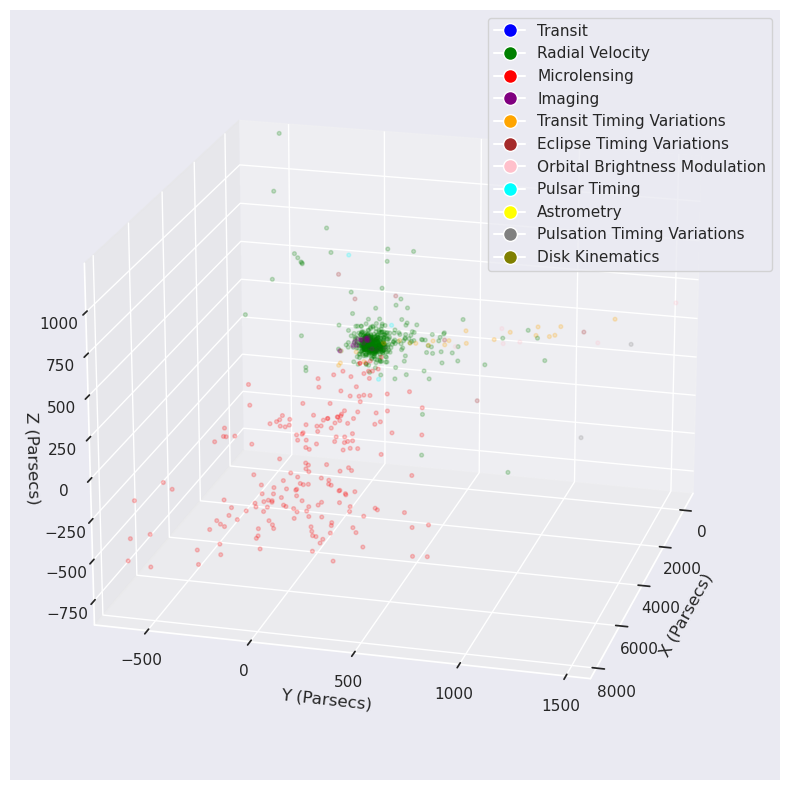

In [19]:
from mpl_toolkits.mplot3d import Axes3D

data2 = data2[data2['discoverymethod'] != 'Transit']

color_map = {
    'Transit': 'blue',
    'Radial Velocity': 'green',
    'Microlensing': 'red',
    'Imaging': 'purple',
    'Transit Timing Variations': 'orange',
    'Eclipse Timing Variations': 'brown',
    'Orbital Brightness Modulation': 'pink',
    'Pulsar Timing': 'cyan',
    'Astrometry': 'yellow',
    'Pulsation Timing Variations': 'gray',
    'Disk Kinematics': 'olive'
}

# Map the colors based on the 'discovery method' column
colors = data2['discoverymethod'].map(color_map)

x = data2['sy_dist'] * np.cos(np.radians(data2['glon'])) * np.cos(np.radians(data2['glat']))
y = data2['sy_dist'] * np.sin(np.radians(data2['glon'])) * np.cos(np.radians(data2['glat']))
z = data2['sy_dist'] * np.sin(np.radians(data2['glat']))


earth_latitude = 0  # Replace with the actual galactic latitude of Earth
earth_longitude = 0  # Replace with the actual galactic longitude of Earth
earth_distance = 0  # Replace with the actual distance from Earth to the galactic center

# Convert galactic coordinates to Cartesian coordinates for Earth
earth_x = earth_distance * np.cos(np.radians(earth_longitude)) * np.cos(np.radians(earth_latitude))
earth_y = earth_distance * np.sin(np.radians(earth_longitude)) * np.cos(np.radians(earth_latitude))
earth_z = earth_distance * np.sin(np.radians(earth_latitude))

galactic_plane_latitude = 0  # Latitude at which the galactic plane is displayed
galactic_plane_size = 500 

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=30, c=colors, marker='.', alpha=0.2)


# Plot Earth in green
#ax.scatter(earth_x, earth_y, earth_z, s=500, c='r', marker='.', label='Earth')

# Set labels
ax.set_xlabel('X (Parsecs)')
ax.set_ylabel('Y (Parsecs)')
ax.set_zlabel('Z (Parsecs)')

galactic_plane_x = np.linspace(-2000, max(x), 10)
galactic_plane_y = np.linspace(min(y), max(y), 10)
galactic_plane_x, galactic_plane_y = np.meshgrid(galactic_plane_x, galactic_plane_y)
galactic_plane_z = np.full_like(galactic_plane_x, galactic_plane_size * np.sin(np.radians(galactic_plane_latitude)))

#ax.plot_surface(galactic_plane_x, galactic_plane_y, galactic_plane_z, alpha=.1, color='blue', label='Galactic Plane')

ax.set_xlim([min(x), max(x)])
ax.set_ylim([min(y), max(y)])
ax.set_zlim([min(z), max(z)])

#ax.set_xlim([-250, 250])
#ax.set_ylim([-250, 250])
#ax.set_zlim([-250, 250])


ax.view_init(elev=20, azim=15)

legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in color_map.values()]
ax.legend(legend_labels, color_map.keys(), loc='upper right')


# Show the plot
plt.show()

In [20]:
planets['eccenflag'] = planets['pl_orbeccen'].apply(lambda x: 'zero' if x == 0 else 'nonzero')

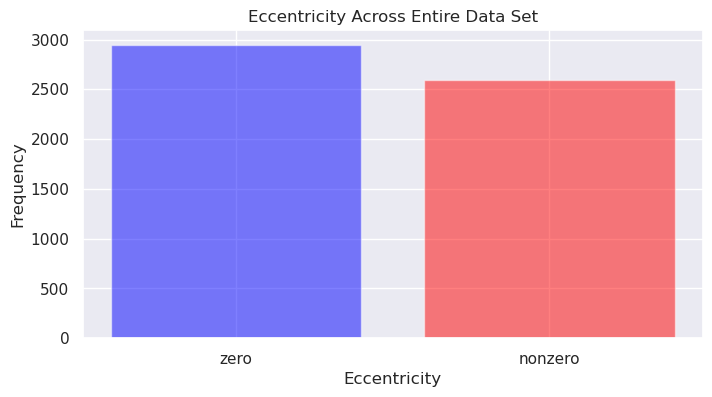

In [21]:
plt.figure(figsize=(8, 4))

plt.bar(planets.eccenflag.value_counts().index , planets.eccenflag.value_counts(), color=['blue','red'], alpha=.5)
plt.title('Eccentricity Across Entire Data Set')
plt.xlabel('Eccentricity')
plt.ylabel('Frequency')

plt.show()

In [22]:
nozeroecc=planets[planets['pl_orbeccen']>0]

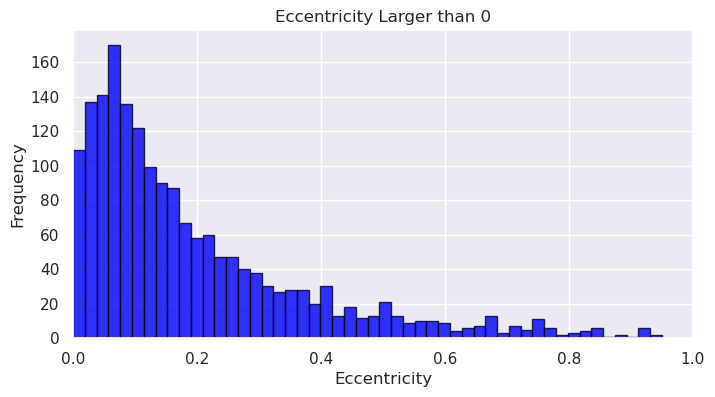

In [23]:
plt.figure(figsize=(8, 4))

plt.hist(nozeroecc.pl_orbeccen , bins=50, color='blue', edgecolor='black',alpha=.8)
plt.title('Eccentricity Larger than 0')
plt.xlabel('Eccentricity')
plt.ylabel('Frequency')
plt.xlim([0,1])
plt.show()

In [24]:
planets[['pl_name','pl_orbeccen']].sort_values('pl_orbeccen',ascending=False).head(10)

,pl_name,pl_orbeccen
966,HD 28254 b,0.95000
1272,HIP 66074 b,0.94800
1148,HD 80606 b,0.93043
220,GJ 3222 b,0.92900
1150,HD 80869 b,0.92400
950,HD 26161 b,0.92200
2906,Kepler-1704 b,0.92000
844,HD 20782 b,0.92000
1034,HD 4113 b,0.89900
63,BD+63 1405 b,0.89100


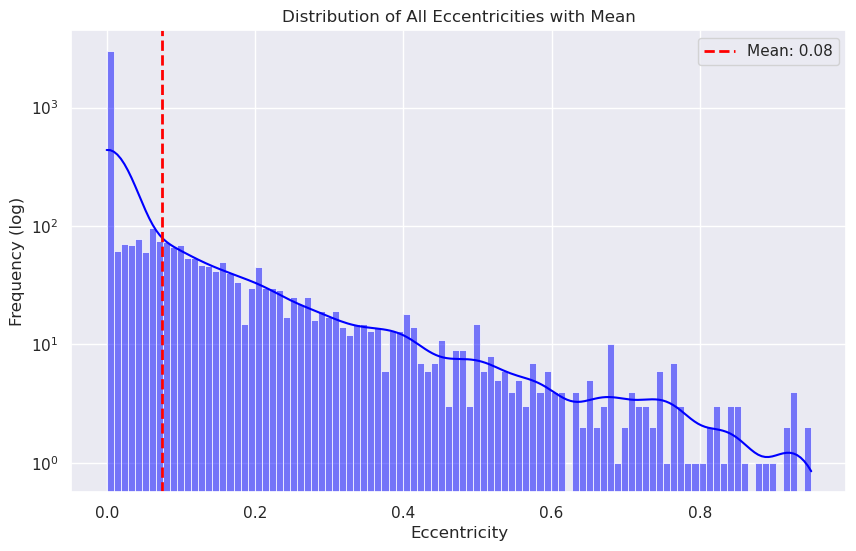

In [25]:
your_variable = planets['pl_orbeccen']

# Plotting a histogram
plt.figure(figsize=(10, 6))
sns.histplot(your_variable, kde=True, color='blue', bins=100)

# Calculating mean and standard deviation
mean_value = planets.pl_orbeccen.mean()
std_dev_value = planets.pl_orbeccen.std()

# Annotating mean and standard deviation on the plot
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.annotate(f'Std Dev: {std_dev_value:.2f}', xy=(std_dev_value, 0.015), xytext=(std_dev_value + 1, 0.02),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)

# Adding labels and title
plt.xlabel('Eccentricity')
plt.ylabel('Frequency (log)')
plt.title('Distribution of All Eccentricities with Mean')
plt.yscale('log')

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [26]:
dfe=planets[planets['pl_orbeccen'].notna()]
dfe=dfe[dfe['sy_pnum']>1]
median_eccen = dfe.groupby('hostname')['pl_orbeccen'].transform('median')
dfe['ref_eccen'] = np.where((dfe['sy_pnum'] > 1) & (~median_eccen.isna()), median_eccen, np.nan)

# Step 2: Create 'rel_incl' column
dfe['rel_eccen'] = np.where(dfe['sy_pnum'] > 1, np.abs(dfe['pl_orbeccen'] - pd.to_numeric(dfe['ref_eccen'], errors='coerce')), np.nan)
dfe=dfe[['hostname','pl_name','sy_pnum','pl_orbeccen','ref_eccen','rel_eccen']].sort_values('hostname')
dfe.head(15)

,hostname,pl_name,sy_pnum,pl_orbeccen,ref_eccen,rel_eccen
3,14 Her,14 Her b,2,0.3730,0.383,0.0100
638,14 Her,HD 145675 c,2,0.3930,0.383,0.0100
9,24 Sex,24 Sex b,2,0.0900,0.190,0.1000
10,24 Sex,24 Sex c,2,0.2900,0.190,0.1000
3957,2MASS J19383260+4603591,Kepler-451 d,3,0.0000,0.290,0.2900
3956,2MASS J19383260+4603591,Kepler-451 c,3,0.2900,0.290,0.0000
17,2MASS J19383260+4603591,2MASS J19383260+4603591 b,3,0.3300,0.290,0.0400
24,47 UMa,47 UMa d,3,0.3800,0.179,0.2010
23,47 UMa,47 UMa c,3,0.1790,0.179,0.0000
22,47 UMa,47 UMa b,3,0.0160,0.179,0.1630


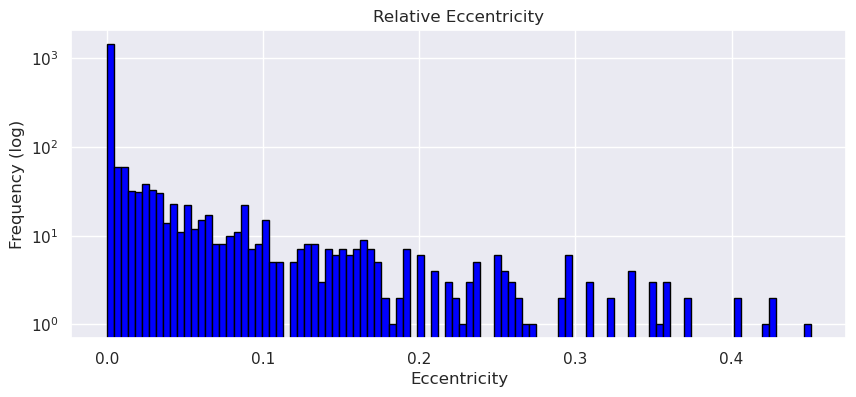

In [27]:
plt.figure(figsize=(10, 4))

plt.hist(dfe['rel_eccen'] ,bins=100, color='blue', edgecolor='black')
plt.title('Relative Eccentricity')
plt.xlabel('Eccentricity')
plt.ylabel('Frequency (log)')
plt.yscale("log")
plt.show()

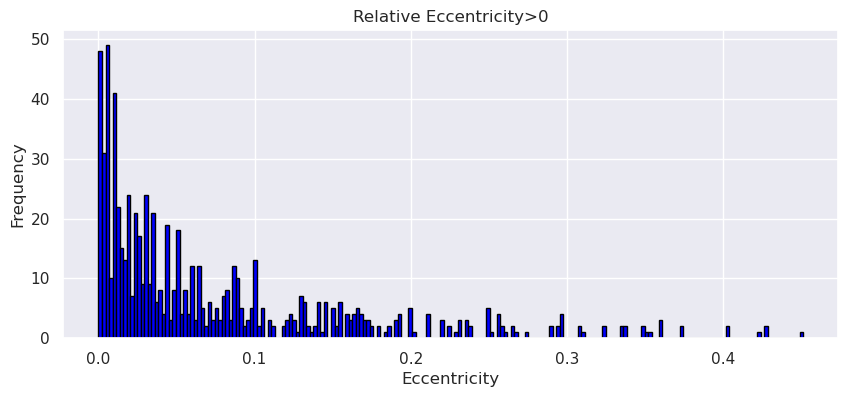

In [28]:
plt.figure(figsize=(10, 4))

plt.hist(dfe[dfe['rel_eccen']>0]['rel_eccen'] ,bins=200, color='blue', edgecolor='black')
plt.title('Relative Eccentricity>0')
plt.xlabel('Eccentricity')
plt.ylabel('Frequency')
plt.show()

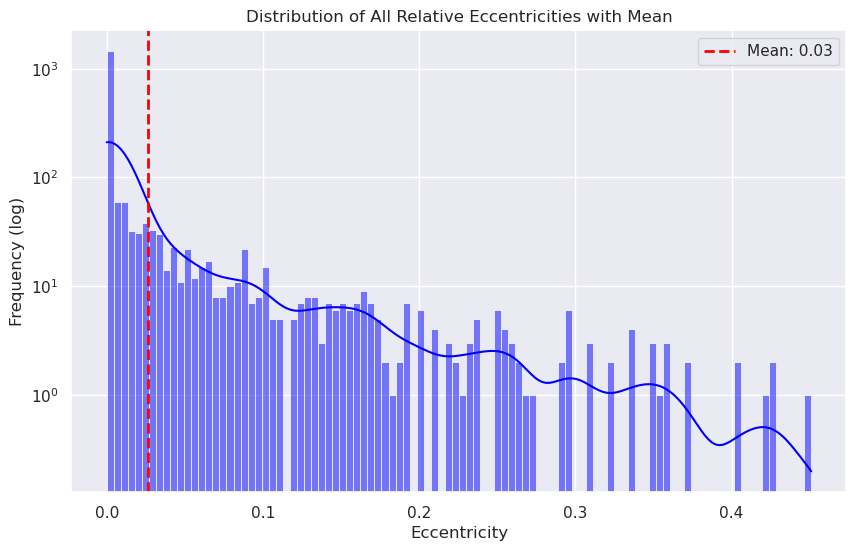

In [29]:
your_variable = dfe['rel_eccen']

# Plotting a histogram
plt.figure(figsize=(10, 6))
sns.histplot(your_variable, kde=True, color='blue', bins=100)

# Calculating mean and standard deviation
mean_value = dfe.rel_eccen.mean()
std_dev_value = dfe.rel_eccen.std()

# Annotating mean and standard deviation on the plot
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.annotate(f'Std Dev: {std_dev_value:.2f}', xy=(std_dev_value, 0.015), xytext=(std_dev_value + 1, 0.02),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)

# Adding labels and title
plt.xlabel('Eccentricity')
plt.ylabel('Frequency (log)')
plt.title('Distribution of All Relative Eccentricities with Mean')
plt.yscale('log')

# Adding legend
plt.legend()

# Display the plot
plt.show()

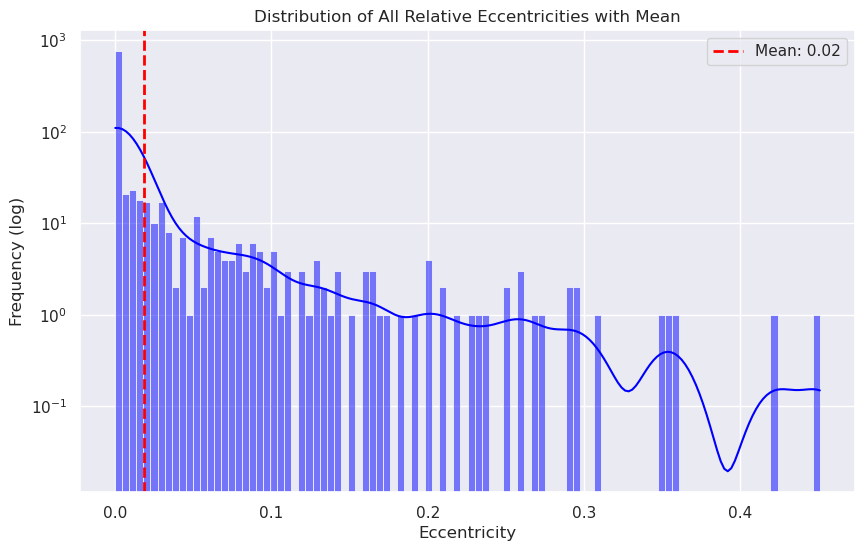

In [30]:
your_variable = dfe[dfe.sy_pnum>2]['rel_eccen']

# Plotting a histogram
plt.figure(figsize=(10, 6))
sns.histplot(your_variable, kde=True, color='blue', bins=100)

# Calculating mean and standard deviation
mean_value = dfe[dfe.sy_pnum>2].rel_eccen.mean()
std_dev_value = dfe[dfe.sy_pnum>2].rel_eccen.std()

# Annotating mean and standard deviation on the plot
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
#plt.annotate(f'Std Dev: {std_dev_value:.2f}', xy=(std_dev_value, 0.015), xytext=(std_dev_value + 1, 0.02),
 #            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)

# Adding labels and title
plt.xlabel('Eccentricity')
plt.ylabel('Frequency (log)')
plt.title('Distribution of All Relative Eccentricities with Mean')
plt.yscale('log')

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [31]:
dfe[['pl_name','rel_eccen','sy_pnum']].sort_values('rel_eccen', ascending=False).head(10)

,pl_name,rel_eccen,sy_pnum
5224,TOI-712 b,0.45100,3
1590,K2-312 c,0.42650,2
1149,HD 80653 b,0.42650,2
1020,HD 39091 b,0.42200,3
5415,WASP-53 c,0.40345,2
5414,WASP-53 b,0.40345,2
1162,HD 83443 c,0.37400,2
1161,HD 83443 b,0.37400,2
904,HD 219828 c,0.36000,2
903,HD 219828 b,0.36000,2


In [32]:
dfe[dfe.sy_pnum>2][['pl_name','rel_eccen','pl_orbeccen','sy_pnum']].sort_values('rel_eccen', ascending=False).head(10)


,pl_name,rel_eccen,pl_orbeccen,sy_pnum
5224,TOI-712 b,0.45100,0.540,3
1020,HD 39091 b,0.42200,0.642,3
668,HD 153557 c,0.35900,0.511,3
4542,Kepler-88 d,0.35276,0.410,3
1309,HR 8799 e,0.35000,0.150,4
1360,K2-138 f,0.31050,0.364,6
573,HD 125612 b,0.29700,0.446,3
958,HD 27894 d,0.29600,0.343,3
3957,Kepler-451 d,0.29000,0.000,3
2861,Kepler-167 e,0.29000,0.290,4


In [33]:
dfe['sy_pnum'].value_counts()

sy_pnum
2    1110
3     543
4     281
5     110
6      53
8       7
7       7
Name: count, dtype: int64

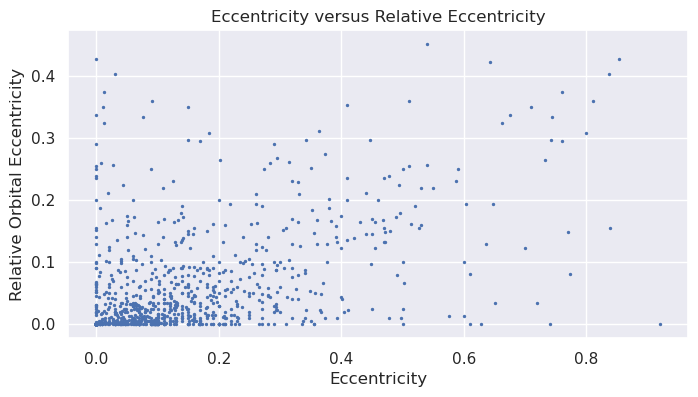

In [34]:
plt.figure(figsize=(8, 4))

plt.scatter(dfe.pl_orbeccen, dfe.rel_eccen, s=2)
plt.title('Eccentricity versus Relative Eccentricity')
plt.xlabel('Eccentricity')
plt.ylabel('Relative Orbital Eccentricity')
plt.show()

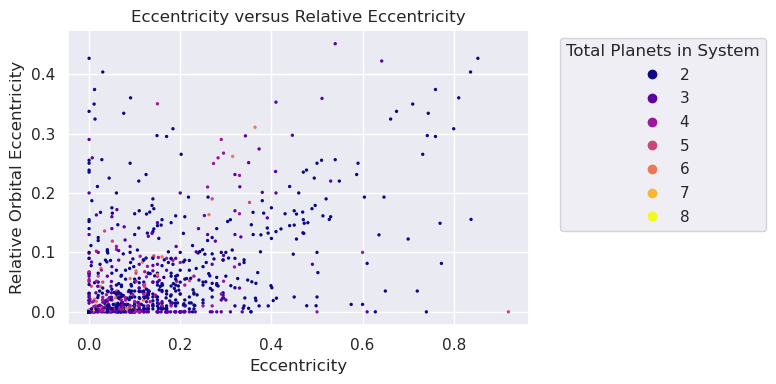

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# Assuming 'sy_pnum' is a variable in your DataFrame
scatter = plt.scatter(dfe['pl_orbeccen'], dfe['rel_eccen'], s=2, c=dfe['sy_pnum'], cmap='plasma')

plt.title('Eccentricity versus Relative Eccentricity')
plt.xlabel('Eccentricity')
plt.ylabel('Relative Orbital Eccentricity')

# Moving the legend outside the plot area
plt.legend(*scatter.legend_elements(), title='Total Planets in System', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Ensures the layout is adjusted to prevent clipping of the legend
plt.show()

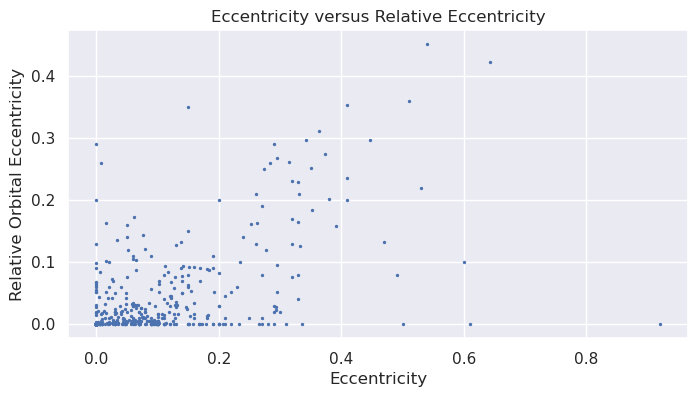

In [36]:
plt.figure(figsize=(8, 4))

plt.scatter(dfe[dfe.sy_pnum>2].pl_orbeccen, dfe[dfe.sy_pnum>2].rel_eccen, s=2)
plt.title('Eccentricity versus Relative Eccentricity')
plt.xlabel('Eccentricity')
plt.ylabel('Relative Orbital Eccentricity')
plt.show()

In [37]:
this=planets[(planets.pl_orbsmax>400) & (planets.pl_orbsmax<10000)][['pl_name','pl_orbsmax']].sort_values('pl_orbsmax', ascending=False).reset_index()
this

,index,pl_name,pl_orbsmax
0,81,COCONUTS-2 b,7506.0
1,5277,USco1556 b,3500.0
2,5278,USco1621 b,2880.0
3,5467,WD 0806-661 b,2500.0
4,312,GU Psc b,2000.0
5,62,BD+60 1417 b,1662.0
6,4926,Ross 458 c,1100.0
7,175,FU Tau b,800.0
8,1299,HN Peg b,773.0
9,1282,HIP 78530 b,740.0


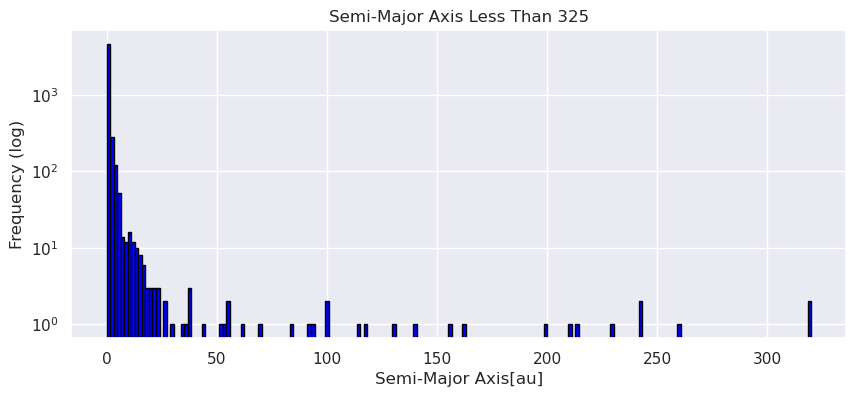

In [38]:
plt.figure(figsize=(10, 4))

plt.hist(planets[(planets.pl_orbsmax>0) & (planets.pl_orbsmax<325)].pl_orbsmax,bins=200, color='blue', edgecolor='black')
plt.title('Semi-Major Axis Less Than 325')
plt.xlabel('Semi-Major Axis[au]')
plt.ylabel('Frequency (log)')
plt.yscale("log")
plt.show()

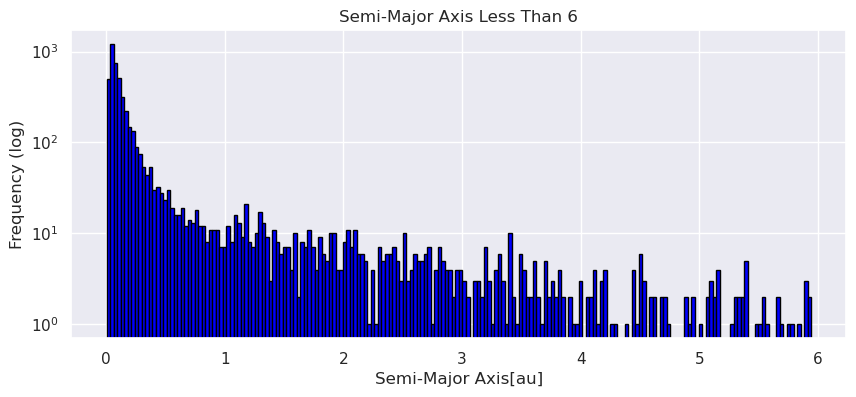

In [39]:
plt.figure(figsize=(10, 4))

plt.hist(planets[(planets.pl_orbsmax>0) & (planets.pl_orbsmax<6)].pl_orbsmax,bins=200, color='blue', edgecolor='black')
plt.title('Semi-Major Axis Less Than 6')
plt.xlabel('Semi-Major Axis[au]')
plt.ylabel('Frequency (log)')
plt.yscale("log")
plt.show()

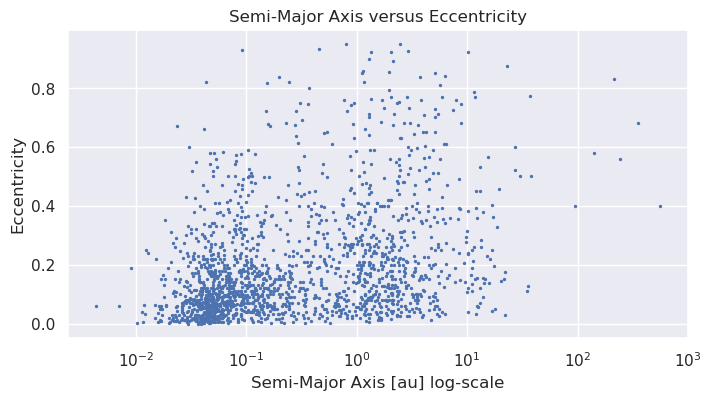

In [40]:
plt.figure(figsize=(8, 4))

plt.scatter(planets[planets.pl_orbeccen>0].pl_orbsmax , planets[planets.pl_orbeccen>0].pl_orbeccen, s=2)
plt.title('Semi-Major Axis versus Eccentricity')
plt.xlabel('Semi-Major Axis [au] log-scale')
plt.ylabel('Eccentricity')
plt.xscale("log")
plt.show()

In [41]:
planets['per']=planets.pl_orbsmax*(1-planets.pl_orbeccen)
planets['apa']=planets.pl_orbsmax*(1+planets.pl_orbeccen)

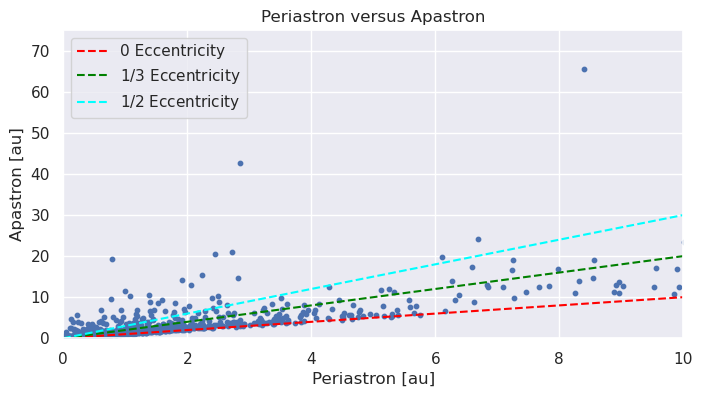

In [42]:
plt.figure(figsize=(8, 4))

plt.scatter(planets.per , planets.apa, s=10)
plt.title('Periastron versus Apastron')
plt.xlabel('Periastron [au]')
plt.ylabel('Apastron [au]')
plt.xlim([0,10])
plt.ylim([0,75])

x_line = np.linspace(.001, 350, 100)  # Generate x values for the line
y_line = x_line  # y values for a line with slope 1 and intercept 0
plt.plot(x_line, y_line, color='red', linestyle='--', label='0 Eccentricity')

y_line2 = 2*x_line  # y values for a line with slope 1 and intercept 0
plt.plot(x_line, y_line2, color='green', linestyle='--', label='$1/3$ Eccentricity')


y_line3 = 3*x_line  # y values for a line with slope 1 and intercept 0
plt.plot(x_line, y_line3, color='cyan', linestyle='--', label='$1/2$ Eccentricity')

plt.legend()


plt.show()

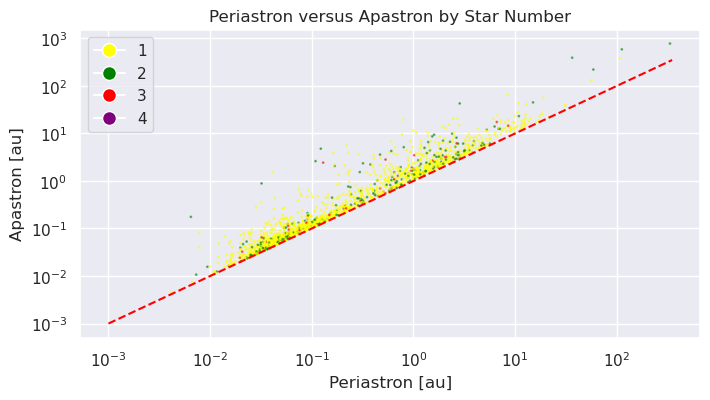

In [43]:
color_map = {
    1: 'yellow',
    2: 'green',
    3: 'red',
    4: 'purple'
}

# Map the colors based on the 'discovery method' column
colors = planets[planets.pl_orbeccen>0]['sy_snum'].map(color_map)

plt.figure(figsize=(8, 4))

plt.scatter(planets[planets.pl_orbeccen>0].per , planets[planets.pl_orbeccen>0].apa, s=1, c=colors, alpha=.5)
plt.title('Periastron versus Apastron by Star Number')
plt.xlabel('Periastron [au]')
plt.ylabel('Apastron [au]')
#plt.xlim([0,350])
#plt.ylim([0,800])

x_line = np.linspace(0.001, 350, 100)  # Generate x values for the line
y_line = x_line  # y values for a line with slope 1 and intercept 0
plt.plot(x_line, y_line, color='red', linestyle='--', label='0 Eccentricity')
plt.xscale("log")
plt.yscale("log")

legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in color_map.values()]
plt.legend(legend_labels, color_map.keys(), loc='upper left')



plt.show()

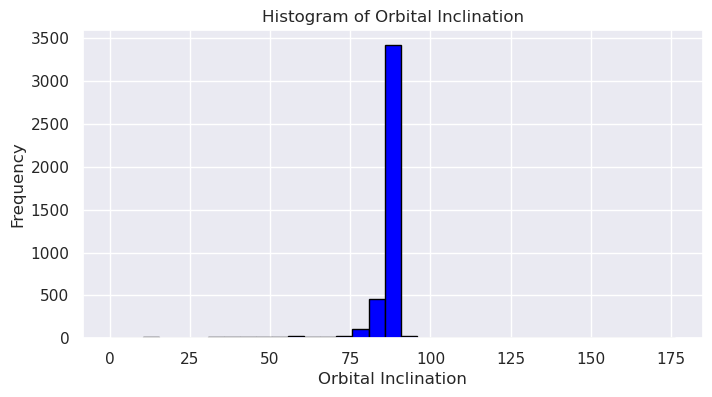

In [44]:
plt.figure(figsize=(8, 4))

plt.hist(abs(planets.pl_orbincl) , bins=35, color='blue', edgecolor='black')
plt.title('Histogram of Orbital Inclination')
plt.xlabel('Orbital Inclination')
plt.ylabel('Frequency')

plt.show()

/home/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in arcsin
  result = getattr(ufunc, method)(*inputs, **kwargs)


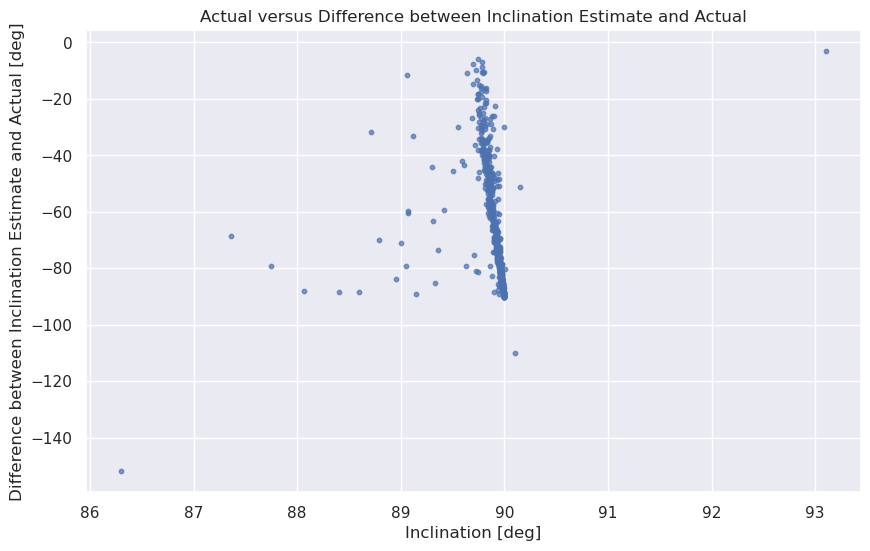

In [45]:
planets['inclest']=(180/np.pi)*np.arcsin((planets.pl_imppar*planets.st_rad)/planets.pl_orbsmax)


planets['incl_diff'] = planets['inclest'] - planets['pl_orbincl']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(planets['pl_orbincl'], planets['incl_diff'], s=10, alpha=0.7)

# Set labels and title
plt.xlabel('Inclination [deg]')
plt.ylabel('Difference between Inclination Estimate and Actual [deg]')
plt.title('Actual versus Difference between Inclination Estimate and Actual')
#plt.colorbar(scatter, label='pl_orbeccen')

# Show the plot
plt.show()

In [46]:
df=planets[planets['pl_orbincl'].notna()]
df=df[df['sy_pnum']>1]
df[df['sy_pnum']>1].groupby(['hostname','pl_name'])['pl_orbincl'].count()
result=df.groupby('hostname')['pl_orbincl'].agg(np.ptp).reset_index().sort_values('pl_orbincl', ascending=False)
result.sort_values('pl_orbincl', ascending=False)

,hostname,pl_orbincl
67,HD 204313,112.092
706,PDS 70,101.400
91,HD 66428,77.299
92,HD 72659,63.304
26,HAT-P-11,47.200
...,...,...
5,CoRoT-20,0.000
759,WASP-18,0.000
760,WASP-41,0.000
4,BD-210397,0.000


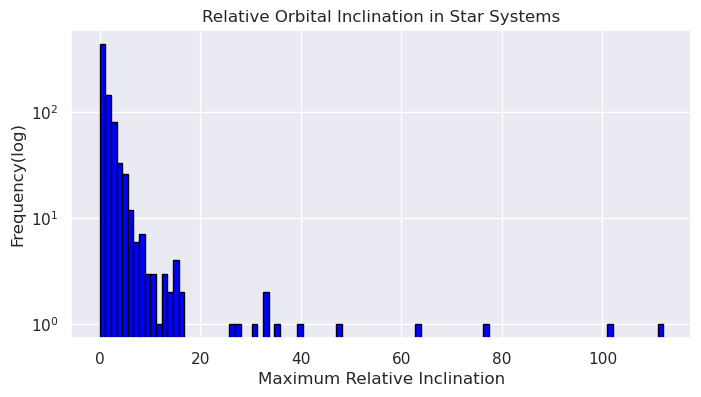

In [47]:
result=df.groupby('hostname')['pl_orbincl'].agg(np.ptp).reset_index().sort_values('pl_orbincl', ascending=False)
result[result['pl_orbincl']>0]

plt.figure(figsize=(8, 4))

plt.hist(result.pl_orbincl , bins=100, color='blue', edgecolor='black')
plt.title('Relative Orbital Inclination in Star Systems')
plt.xlabel('Maximum Relative Inclination')
plt.ylabel('Frequency(log)')
plt.yscale('log')
plt.show()

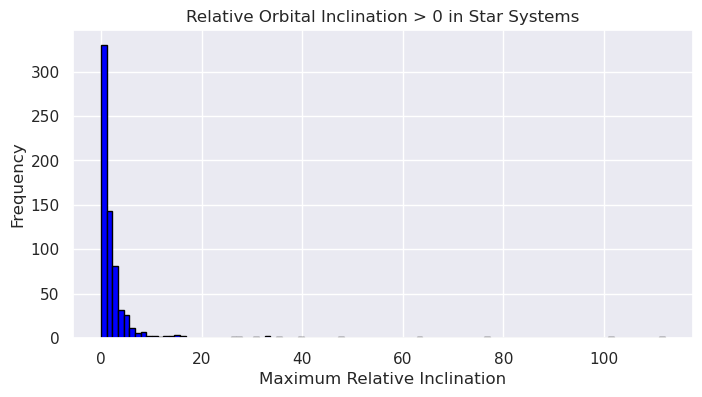

In [48]:
result1=df.groupby('hostname')['pl_orbincl'].agg(np.ptp).reset_index().sort_values('pl_orbincl', ascending=False)
result1[result1['pl_orbincl']>0]

plt.figure(figsize=(8, 4))

plt.hist(result1[result1['pl_orbincl']>0].pl_orbincl , bins=100, color='blue', edgecolor='black')
plt.title('Relative Orbital Inclination > 0 in Star Systems')
plt.xlabel('Maximum Relative Inclination')
plt.ylabel('Frequency')

plt.show()

In [49]:
df.pl_orbincl.info()

<class 'pandas.core.series.Series'>
Index: 1826 entries, 3 to 5521
Series name: pl_orbincl
Non-Null Count  Dtype  
--------------  -----  
1826 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


In [64]:
df=planets[planets['pl_orbincl'].notna()]
df['number'] = df.groupby('hostname')['hostname'].transform('count')

median_incl = df.groupby('hostname')['pl_orbincl'].transform('median')
df['ref_incl'] = np.where((df['sy_pnum'] > 1) & (~median_incl.isna()), median_incl, np.nan)

# Step 2: Create 'rel_incl' column
df['rel_incl'] = np.where(df['number'] > 1, np.abs(df['pl_orbincl'] - pd.to_numeric(df['ref_incl'], errors='coerce')), np.nan)
df2=df[['hostname','pl_name','sy_pnum','ref_incl','rel_incl','sy_pnum','number']].sort_values('hostname')
df2.head(15)


/tmp/ipykernel_24904/1947549648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number'] = df.groupby('hostname')['hostname'].transform('count')
/tmp/ipykernel_24904/1947549648.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ref_incl'] = np.where((df['sy_pnum'] > 1) & (~median_incl.isna()), median_incl, np.nan)
/tmp/ipykernel_24904/1947549648.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,hostname,pl_name,sy_pnum,ref_incl,rel_incl,sy_pnum,number
3,14 Her,14 Her b,2,136.8745,7.7775,2,2
638,14 Her,HD 145675 c,2,136.8745,7.7775,2,2
25,51 Eri,51 Eri b,1,NaN,NaN,1,1
26,51 Peg,51 Peg b,1,NaN,NaN,1,1
28,55 Cnc,55 Cnc c,5,89.7300,0.0000,5,5
29,55 Cnc,55 Cnc d,5,89.7300,0.2700,5,5
30,55 Cnc,55 Cnc e,5,89.7300,6.7300,5,5
31,55 Cnc,55 Cnc f,5,89.7300,0.2700,5,5
27,55 Cnc,55 Cnc b,5,89.7300,0.0000,5,5
36,7 CMa,7 CMa b,2,90.0000,0.0000,2,2


In [50]:
df=planets[planets['pl_orbincl'].notna()]
median_incl = df.groupby('hostname')['pl_orbincl'].transform('median')
df['ref_incl'] = np.where((df['sy_pnum'] > 1) & (~median_incl.isna()), median_incl, np.nan)

# Step 2: Create 'rel_incl' column
df['rel_incl'] = np.where(df['sy_pnum'] > 1, np.abs(df['pl_orbincl'] - pd.to_numeric(df['ref_incl'], errors='coerce')), np.nan)
df2=df[['hostname','pl_name','pl_orbincl','ref_incl','rel_incl']].sort_values('hostname')
df2.head(15)

/tmp/ipykernel_24904/1308032596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ref_incl'] = np.where((df['sy_pnum'] > 1) & (~median_incl.isna()), median_incl, np.nan)
/tmp/ipykernel_24904/1308032596.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rel_incl'] = np.where(df['sy_pnum'] > 1, np.abs(df['pl_orbincl'] - pd.to_numeric(df['ref_incl'], errors='coerce')), np.nan)


,hostname,pl_name,pl_orbincl,ref_incl,rel_incl
3,14 Her,14 Her b,144.652,136.8745,7.7775
638,14 Her,HD 145675 c,129.097,136.8745,7.7775
25,51 Eri,51 Eri b,133.000,NaN,NaN
26,51 Peg,51 Peg b,80.000,NaN,NaN
28,55 Cnc,55 Cnc c,89.730,89.7300,0.0000
29,55 Cnc,55 Cnc d,90.000,89.7300,0.2700
30,55 Cnc,55 Cnc e,83.000,89.7300,6.7300
31,55 Cnc,55 Cnc f,90.000,89.7300,0.2700
27,55 Cnc,55 Cnc b,89.730,89.7300,0.0000
36,7 CMa,7 CMa b,90.000,90.0000,0.0000


In [65]:
df3=df[['hostname','pl_name','pl_orbincl','ref_incl','rel_incl','sy_pnum','number']]
df3.sort_values('rel_incl', ascending=False)

,hostname,pl_name,pl_orbincl,ref_incl,rel_incl,sy_pnum,number
829,HD 204313,HD 204313 b,64.000,120.0460,56.0460,3,2
831,HD 204313,HD 204313 e,176.092,120.0460,56.0460,3,2
4896,PDS 70,PDS 70 c,49.700,100.4000,50.7000,2,2
4895,PDS 70,PDS 70 b,151.100,100.4000,50.7000,2,2
1102,HD 66428,HD 66428 b,16.639,55.2885,38.6495,2,2
...,...,...,...,...,...,...,...
5502,eps Ind A,eps Ind A b,64.250,NaN,NaN,1,1
5512,kap CrB,kap CrB b,60.000,NaN,NaN,1,1
5514,mu2 Sco,mu2 Sco b,96.600,NaN,NaN,1,1
5515,nu Oct A,nu Oct A b,112.500,NaN,NaN,1,1


In [66]:
df4=df3[df3['rel_incl'].notna()]
df4=df4[df4['number']>2]
df4.sort_values('rel_incl',ascending=False).head(10)

,hostname,pl_name,pl_orbincl,ref_incl,rel_incl,sy_pnum,number
4242,Kepler-65,Kepler-65 e,127.00,92.340,34.660,4,4
3720,Kepler-342,Kepler-342 e,58.94,85.045,26.105,4,4
2277,Kepler-124,Kepler-124 b,70.06,86.050,15.990,3,3
1539,K2-266,K2-266 b,75.32,88.865,13.545,4,4
3407,Kepler-238,Kepler-238 b,77.03,89.570,12.540,5,5
4199,Kepler-619,Kepler-619 c,76.66,88.280,11.620,3,3
3590,Kepler-299,Kepler-299 c,78.69,89.460,10.770,4,4
3320,Kepler-207,Kepler-207 d,83.38,74.560,8.820,3,3
3794,Kepler-372,Kepler-372 b,75.35,83.710,8.360,3,3
3575,Kepler-295,Kepler-295 b,77.82,85.870,8.050,3,3


In [51]:
df4

,hostname,pl_name,pl_orbincl,ref_incl,rel_incl,sy_pnum
27,55 Cnc,55 Cnc b,89.73,89.730,0.000,5
28,55 Cnc,55 Cnc c,89.73,89.730,0.000,5
29,55 Cnc,55 Cnc d,90.00,89.730,0.270,5
30,55 Cnc,55 Cnc e,83.00,89.730,6.730,5
31,55 Cnc,55 Cnc f,90.00,89.730,0.270,5
...,...,...,...,...,...,...
5406,WASP-47,WASP-47 c,87.00,89.265,2.265,4
5407,WASP-47,WASP-47 d,89.50,89.265,0.235,4
5408,WASP-47,WASP-47 e,89.60,89.265,0.335,4
5481,XO-2 N,XO-2 N b,87.96,87.960,0.000,3


In [52]:
planets

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_telescope,disc_instrument,pl_controv_flag,pl_orbper,...,sy_dist,sy_plx,sy_vmag,rowupdate,total_discovery_type,eccenflag,per,apa,inclest,incl_diff
0,11 Com b,11 Com,2,1,Radial Velocity,2007-01-01,2.16 m Telescope,Coude Echelle Spectrograph,0,323.210000,...,93.1846,10.71040,4.72307,2023-09-19,Radial Velocity,nonzero,0.897636,1.458364,NaN,NaN
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009-01-01,2.0 m Alfred Jensch Telescope,Coude Echelle Spectrograph,0,516.219970,...,125.3210,7.95388,5.01300,2018-09-04,Radial Velocity,nonzero,1.407600,1.652400,NaN,NaN
2,14 And b,14 And,1,1,Radial Velocity,2008-01-01,1.88 m Telescope,HIDES Echelle Spectrograph,0,186.760000,...,75.4392,13.22890,5.23133,2023-09-19,Radial Velocity,zero,0.775000,0.775000,NaN,NaN
3,14 Her b,14 Her,1,2,Radial Velocity,2002-01-01,10 m Keck I Telescope,HIRES Spectrometer,0,1765.038900,...,17.9323,55.73630,6.61935,2023-06-12,Radial Velocity,nonzero,1.739298,3.808702,NaN,NaN
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996-01-01,Multiple Telescopes,Multiple Instruments,0,799.450000,...,21.1397,47.27540,6.21500,2021-09-20,Radial Velocity,nonzero,0.530957,2.821043,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,ups And b,ups And,2,3,Radial Velocity,1996-01-01,3.0 m C. Donald Shane Telescope,Hamilton Echelle Spectrograph,0,4.617122,...,13.4054,74.57110,4.09565,2022-05-09,Radial Velocity,nonzero,0.058732,0.059548,NaN,NaN
5535,ups And c,ups And,2,3,Radial Velocity,1999-01-01,Multiple Telescopes,Multiple Instruments,0,241.223000,...,13.4054,74.57110,4.09565,2021-09-20,Radial Velocity,nonzero,0.606651,1.046349,NaN,NaN
5536,ups And d,ups And,2,3,Radial Velocity,1999-01-01,Multiple Telescopes,Multiple Instruments,0,1282.410000,...,13.4054,74.57110,4.09565,2021-09-20,Radial Velocity,nonzero,1.777002,3.256998,NaN,NaN
5537,ups Leo b,ups Leo,1,1,Radial Velocity,2021-01-01,1.88 m Telescope,HIDES Echelle Spectrograph,0,385.200000,...,52.5973,18.99390,4.30490,2022-01-10,Radial Velocity,nonzero,0.802400,1.557600,NaN,NaN


In [53]:
ecceninc = pd.merge(dfe, df4, on=['pl_name','hostname','sy_pnum'], how='inner')
eccenincand= pd.merge(ecceninc, planets[['pl_name','pl_orbsmax']], on=['pl_name'], how='inner')

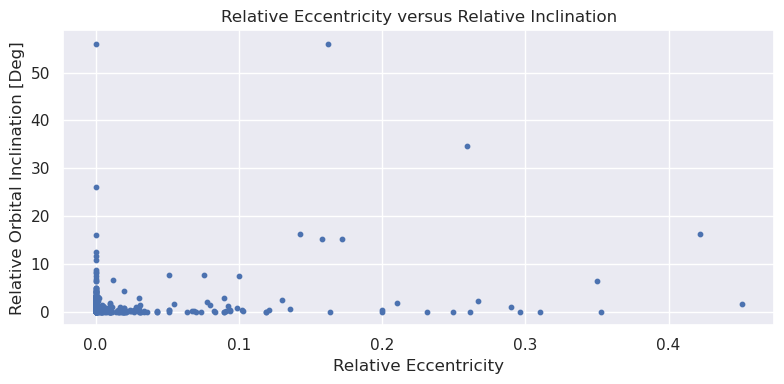

In [54]:
plt.figure(figsize=(8, 4))

# Assuming 'sy_pnum' is a variable in your DataFrame
scatter = plt.scatter(eccenincand['rel_eccen'], eccenincand['rel_incl'], s=10)
plt.title('Relative Eccentricity versus Relative Inclination')
plt.xlabel('Relative Eccentricity')
plt.ylabel('Relative Orbital Inclination [Deg]')


# Show the plot
plt.tight_layout()  # Ensures the layout is adjusted to prevent clipping of the legend
plt.show()

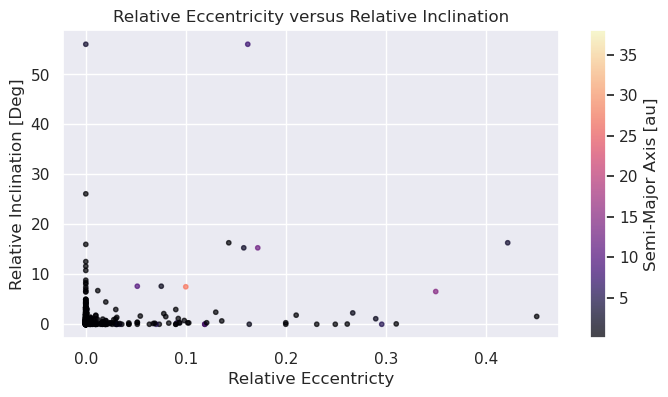

In [55]:
x = eccenincand['rel_eccen']
y = eccenincand['rel_incl']
hue = eccenincand['pl_orbsmax']

plt.figure(figsize=(8, 4))

# Create a scatter plot
scatter = plt.scatter(x, y, c=hue, cmap='magma', s=10, alpha=0.7)

# Add a colorbar
plt.colorbar(scatter, label='Semi-Major Axis [au]')

# Set labels and title
plt.xlabel('Relative Eccentricty')
plt.ylabel('Relative Inclination [Deg]')
plt.title('Relative Eccentricity versus Relative Inclination')

# Show the plot
plt.show()

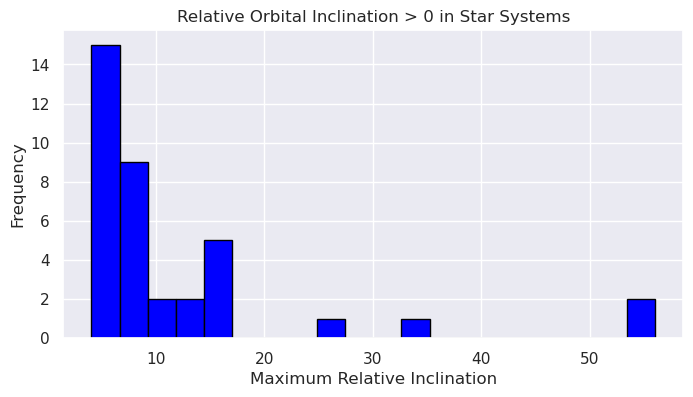

In [56]:
plt.figure(figsize=(8, 4))

plt.hist(df4[df4['rel_incl']>4]['rel_incl'] , bins=20, color='blue', edgecolor='black')
plt.title('Relative Orbital Inclination > 0 in Star Systems')
plt.xlabel('Maximum Relative Inclination')
plt.ylabel('Frequency')
#plt.yscale('log')
plt.show()

In [58]:
planets['sy_pnum'].value_counts()

sy_pnum
1    3186
2    1246
3     606
4     296
5     130
6      60
8       8
7       7
Name: count, dtype: int64

In [59]:
def min_difference(series):
    sorted_values = np.sort(series)
    
    differences = np.diff(sorted_values)
    
    
    min_diff = differences.min() if len(differences) > 0 else np.nan
    
    return min_diff

# Group by 'column1' and 'column2' and calculate the smallest difference of 'value' within each group
result_df = df.groupby(['hostname'])['pl_orbincl'].agg(min_difference).reset_index()
result_df

,hostname,pl_orbincl
0,14 Her,15.555
1,51 Eri,NaN
2,51 Peg,NaN
3,55 Cnc,0.000
4,7 CMa,0.000
...,...,...
3184,kap CrB,NaN
3185,mu2 Sco,NaN
3186,nu Oct A,NaN
3187,nu Oph,0.000


In [60]:
planets.groupby(['hostname','sy_pnum']).count()

,,pl_name,sy_snum,discoverymethod,disc_year,disc_telescope,disc_instrument,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,...,sy_dist,sy_plx,sy_vmag,rowupdate,total_discovery_type,eccenflag,per,apa,inclest,incl_diff
hostname,sy_pnum,,,,,,,,,,,,,,,,,,,,,
11 Com,1,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,0,0
11 UMi,1,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,0,0
14 And,1,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,0,0
14 Her,2,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,0,0
16 Cyg B,1,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tau Cet,4,4,4,4,4,4,4,4,4,4,0,...,4,4,4,4,4,4,4,4,0,0
tau Gem,1,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,0,0
ups And,3,3,3,3,3,3,3,3,3,3,0,...,3,3,3,3,3,3,3,3,0,0


In [61]:
planets['ttv_flag'].value_counts()

ttv_flag
0    5184
1     355
Name: count, dtype: int64

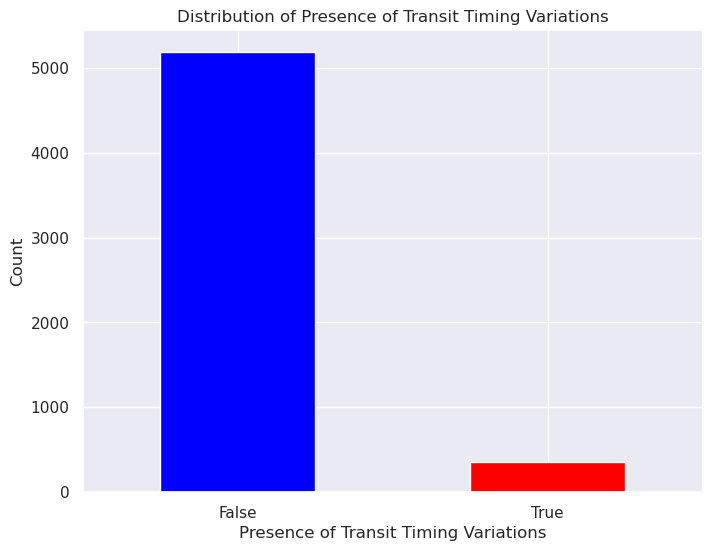

In [67]:
ttv_counts = planets['ttv_flag'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))
ttv_counts.plot(kind='bar', color=['blue', 'red'])

# Set labels and title
plt.xlabel('Presence of Transit Timing Variations')
plt.ylabel('Count')
plt.title('Distribution of Presence of Transit Timing Variations')

# Set x-axis tick labels
plt.xticks(ttv_counts.index, ['False', 'True'], rotation=0)

# Show the plot
plt.show()

In [66]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5539 entries, 0 to 5538
Data columns (total 60 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   pl_name               5539 non-null   object        
 1   hostname              5539 non-null   object        
 2   sy_snum               5539 non-null   int64         
 3   sy_pnum               5539 non-null   int64         
 4   discoverymethod       5539 non-null   object        
 5   disc_year             5539 non-null   datetime64[ns]
 6   disc_telescope        5539 non-null   object        
 7   disc_instrument       5539 non-null   object        
 8   pl_controv_flag       5539 non-null   int64         
 9   pl_orbper             5296 non-null   float64       
 10  pl_orbsmax            5238 non-null   float64       
 11  pl_rade               4202 non-null   float64       
 12  pl_bmasse             2623 non-null   float64       
 13  pl_dens           

In [89]:
mass=planets.groupby('hostname')[['st_mass','st_rad','st_age']].mean().reset_index()
mass

,hostname,st_mass,st_rad,st_age
0,11 Com,2.09,13.76,NaN
1,11 UMi,2.78,29.79,1.56
2,14 And,1.78,11.55,NaN
3,14 Her,0.91,1.00,3.90
4,16 Cyg B,0.98,1.16,NaN
...,...,...,...,...
4123,tau Cet,0.78,NaN,NaN
4124,tau Gem,2.30,28.72,1.22
4125,ups And,1.29,1.62,3.12
4126,ups Leo,1.48,11.22,NaN


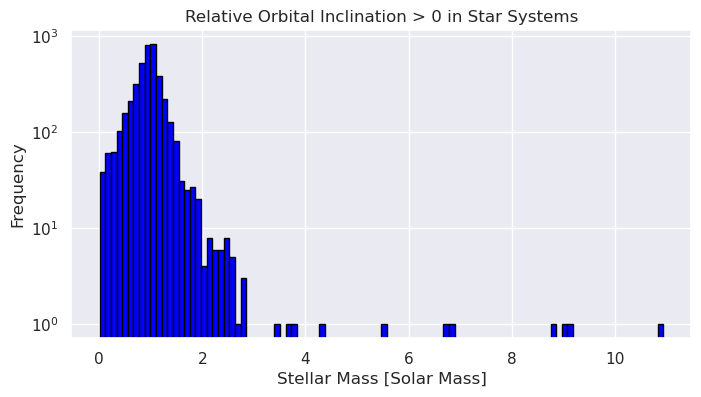

In [113]:
plt.figure(figsize=(8, 4))

plt.hist(mass.st_mass, bins=100, color='blue', edgecolor='black')
plt.title('Frequency of Stellar Masses')
plt.xlabel('Stellar Mass [Solar Mass]')
plt.ylabel('Frequency (log)')
plt.yscale('log')
plt.show()

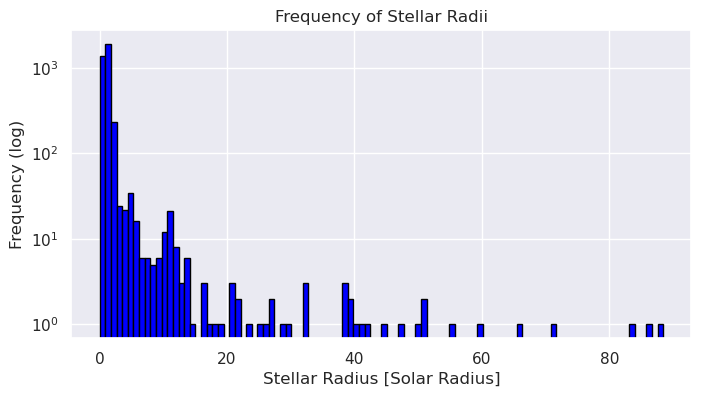

In [114]:
plt.figure(figsize=(8, 4))

plt.hist(mass.st_rad, bins=100, color='blue', edgecolor='black')
plt.title('Frequency of Stellar Radii')
plt.xlabel('Stellar Radius [Solar Radius]')
plt.ylabel('Frequency (log)')
plt.yscale('log')
plt.show()

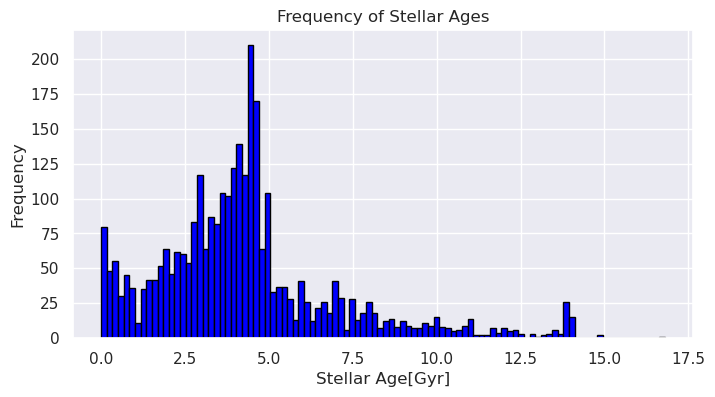

In [115]:
plt.figure(figsize=(8, 4))

plt.hist(mass.st_age, bins=100, color='blue', edgecolor='black')
plt.title('Frequency of Stellar Ages')
plt.xlabel('Stellar Age[Gyr]')
plt.ylabel('Frequency')
#plt.yscale('log')
plt.show()

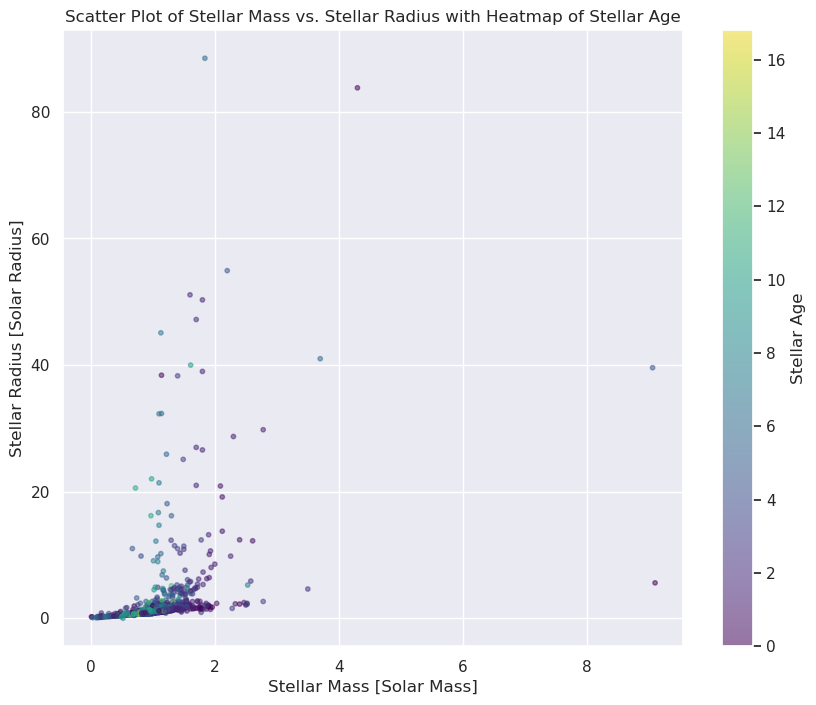

In [116]:
plt.figure(figsize=(10, 8))
scatter_plot = plt.scatter(x=mass['st_mass'], y=mass['st_rad'], c=mass['st_age'], cmap='viridis', s=10, alpha=.5)

# Set labels and title
plt.xlabel('Stellar Mass [Solar Mass]')
plt.ylabel('Stellar Radius [Solar Radius]')
plt.title('Scatter Plot of Stellar Mass vs. Stellar Radius with Heatmap of Stellar Age')

# Add colorbar
cbar = plt.colorbar(scatter_plot)
cbar.set_label('Stellar Age')

# Show the plot
plt.show()